### Data Preprocessing
- Import Libraries

In [1]:
# import needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load CSV file with Pandas

In [2]:
# using pandas load dataset into cardio_fitness variable
cardio_fitness_df = pd.read_csv('CardioGoodFitness-1.csv')

In [3]:
# display data by printing first five rows
cardio_fitness_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### General overview of dataset: Inspection and Cleaning

In [4]:
# using the .info() method to check some characteristics of the dataset
cardio_fitness_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- the dataset has 180 entries/rows and columns
- No nan values
- It has all it's values in their appropriate data type

### Check for NaN values
from the previous cell, we see that there are no null values but I double check using the .isnull().sum()

In [5]:
# this .isnull().sum() quantifies the total number of null value if there is any
cardio_fitness_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

- There are no null values in this dataset

### Check for duplicates

In [6]:
# Checking duplicate rows
print(cardio_fitness_df.duplicated()== True)

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool


- There are no duplicate rows or entries in this dataset

### Numerical Evaluation of dataset

In [7]:
# To get the numerical evaluation, I used .describe(), then added include = 'all' to also get evaluation of categorical variable
cardio_fitness_df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


- From the table above, we see the total count of each column entries
- It shows we have 3 unique entries for product and 2 unique entries each for Gender and MaritalStatus
- The top is also regarded as the mode, the mode the product is TM195 with a frequency of 80 out of 180, so the rest 2 unique entries get to share the remaining 100 
- The top in the column for Gender is Male with the frequency of 104, the top/mode for MaritalStatus is Patnered with the frequency of 107 (frequency means occurence).
- The mean of the Age is 28.788889
- The minimum Age of the customer is 18 and the maximum Age is 50, 25% of the customers are 24 years of Age, 50 percentile whichis also the median Age of customers is 26 years old. 
- Other evalution can be seen in the table 


### Data Visualization: Univariate and multivariate analyses

### For Product
I will be using histplot because it is univariate

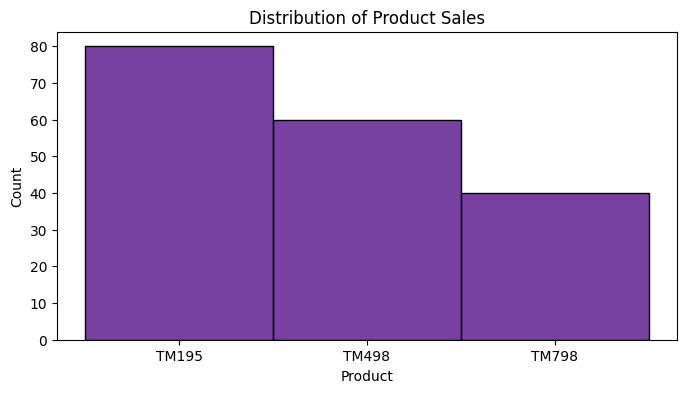

In [8]:
# Visualizing the product column to see which product has more sales

plt.figure(figsize=(8,4)) # how big or small i want my plot to be

# Using seaborn, displaying with countplot and passing in the parameters to the countplot
sns.histplot(data=cardio_fitness_df, x='Product', color='indigo')

# Naming the graph
plt.title("Distribution of Product Sales")

# labelling the x axis
plt.xlabel("Product")

# labelling the y axis
plt.ylabel("Count")
plt.show()

### Insight on Product sale distribution
- From my initial observation using the .describe(include = 'all') I saw that the mode/top product was TM195 and this above visualization of product sales confirms that the TM195 product has the highest sales

### For Product condition by Gender
This is to visualize which gender patronises which product the most

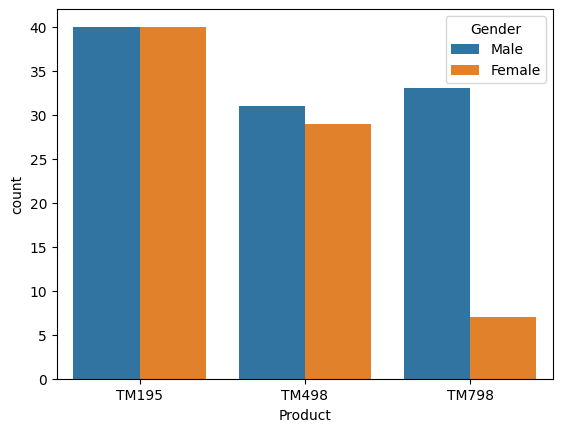

In [9]:
# visualize using countplot, hue=Gender is what we are conditioning the product by
sns.countplot(x="Product", hue="Gender", data=cardio_fitness_df)
plt.show()

### Insight on Product condition by Gender:
- From this Visualization we see that both gender equally patronize the most sold product (TM195 aka the hot product)
- We see higher patronage from the male gender for the TM498 product
- TM798 product has the interest of most males than females

### Miles conditioned by Product:
Checking for the average miles of the 3 unique product
- Because one variable is continuous and the other variable is categorical, I used line chart

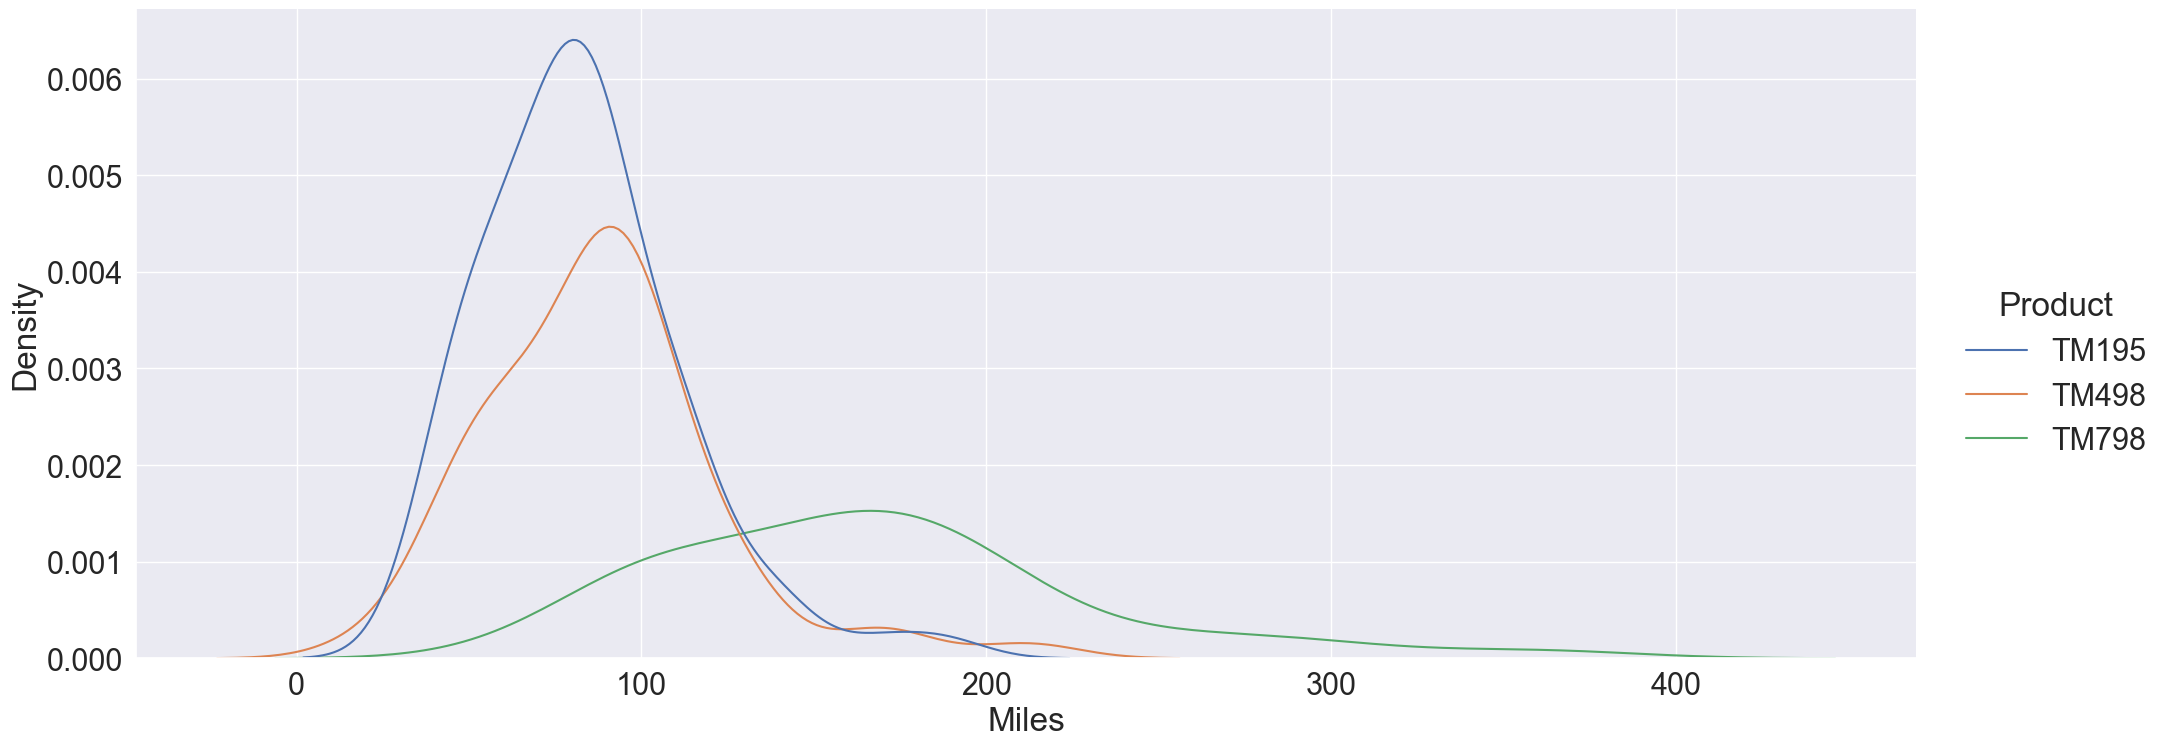

In [10]:
# Calculating average number of miles for each product using a line chart
sns.set(font_scale = 2)
sns.displot(data = cardio_fitness_df, x="Miles", hue="Product",kind='kde', height=8, aspect=2.5);

### Insight on Miles conditioned by Product:
- This means that the TM798 has better capacity as it can go more miles than the other 2 product. This is goodnews for running addicts

### Customers pay range: Income analysis
I use a box plot because because it is univariate and continuous

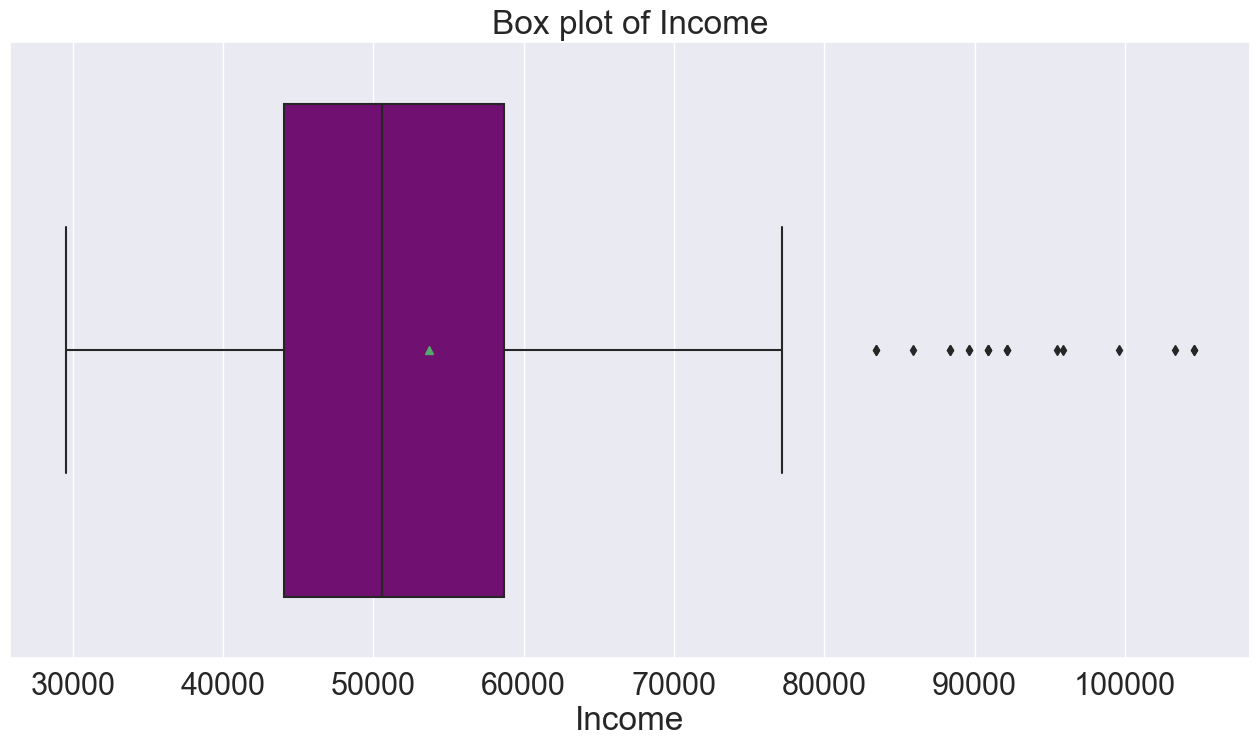

In [11]:
plt.figure(figsize=(16,8)) # how big or small i want my plot to be


sns.boxplot(x = cardio_fitness_df['Income'], showmeans=True, color='purple')

plt.xlabel('Income')
plt.title('Box plot of Income')
plt.show()

### Insight on Income analysis:
- This plot gives us proper visuals of the numerical evaluation of the income than what i got using the .describe()
- The mean income 53719.57 the minimum income is 29562.0, 25% to 75% of the customers income is within 44058.7 and 58668.0, the outlier are the maximum earners with income range of approximately 83000.0 to 104581.00
- In other words majority are lower earners


### Income and Age conditioned Product and Usage
Use of scatter plots because there are 2 continous variables conditioned by categorical variables

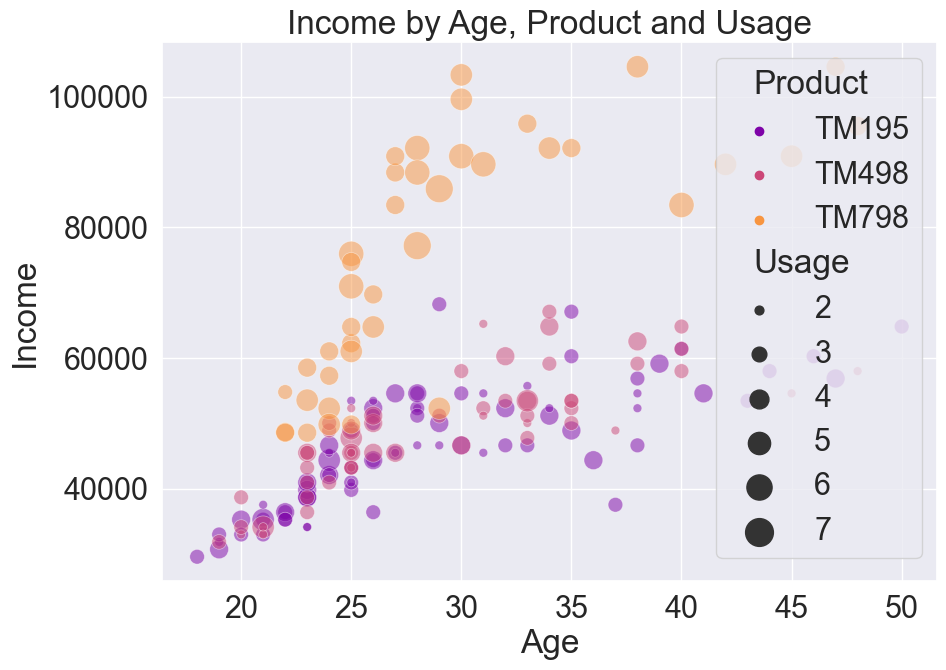

In [12]:
plt.figure(figsize=(10,7)) # figsize determines how big or small i want my plot to be

# using scatterplot for proper visualization
sns.scatterplot(x='Age', y='Income', hue='Product', size='Usage',
                sizes=(40, 400), alpha=.5, palette='plasma', data = cardio_fitness_df)

plt.title('Income by Age, Product and Usage')
plt.show()

### Insight on Age conditioned Product and Usage
Based on the analysis, it is evident that customers between the ages of 23 and 35, with annual incomes under 70,000, tend to purchase the TM195 and TM498 products. Conversely, customers with annual incomes of more than 70,000 and between the ages of 23 and 30 are the primary buyers of the TM798 product.

### Correlation Analysis of dataset

C:\Users\USER1\AppData\Local\Temp\ipykernel_16320\637910729.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cardio_fitness_df.corr(method='pearson')


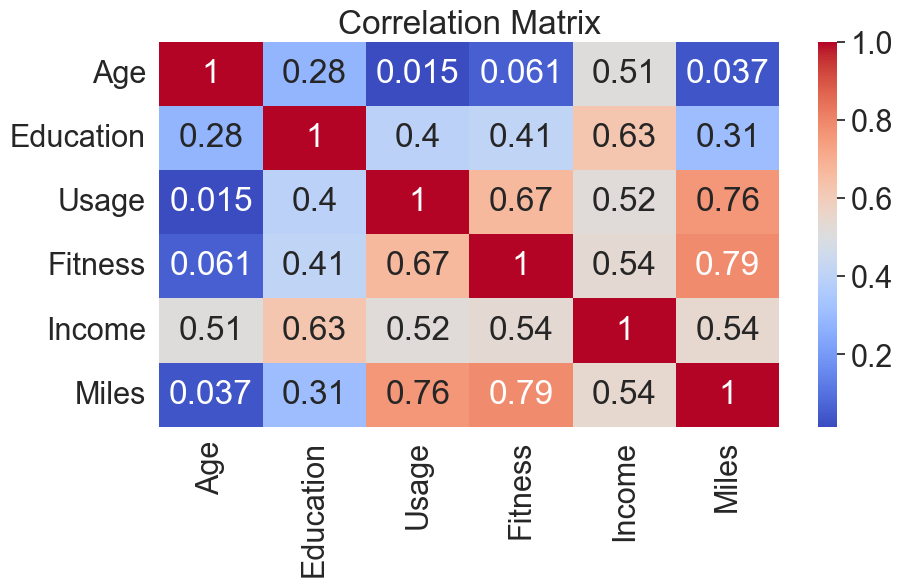

In [13]:
# get the correlation of the dataset using the method corr() and assign it to a variable, called corr_matrix
corr_matrix = cardio_fitness_df.corr(method='pearson')

plt.figure(figsize=(10,5))  #figsize determines how big or small i want my plot to be

# using heatmap for proper presentation of correlation, pass the corr_matrix variable into the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

### Insight on correlation:
Take a look at this heatmap displaying the correlations between variables in our dataset. We noticed a robust and positive correlation of 0.79 between Fitness and Miles, indicating that as an individual becomes more fit, they tend to run more miles.

Additionally, we found that the correlation between Fitness and Usage is 0.67 and the correlation between Fitness and MilesPerUsage is 0.56. This suggests that the more frequently one runs, the more miles they are likely to cover.

Another interesting finding is the correlation between income and education, which is 0.63. This suggests that the more time an individual spends on education, obtaining certifications and improving their skills, the higher their earning potential is likely to be. So not only does education lead to personal growth and development, but it can also impact one's financial success.


### My recommendation for targetting new customers
After analyzing the customer base, I found that both male and female customers are equally interested in the TM195 and TM498 products due to their affordability and ability to meet the needs of individuals who want to maintain a healthy lifestyle. In contrast, the TM798 product is designed for running enthusiasts, such as sports enthusiasts and athletes, who require advanced features for their workouts.

To effectively target running addicts, I recommend that the company focus on promoting the TM798 product to male customers, given that the vast majority of its current customers are male. Meanwhile, for individuals seeking general well-being and healthy living, I recommend targeting the TM195 and TM498 products through targeted advertising campaigns that emphasize their affordability and fitness benefits.